In [1]:
# import os
# import numpy as np
# import whisper 
# from pydub import AudioSegment

# model = whisper.load_model("tiny")

In [2]:
# current_directory = os.getcwd()
# result = model.transcribe(current_directory + "/recordings/test_2.mp3", fp16= True)
# print(result["text"])

In [3]:
# import os

# from groq import Groq

# client = Groq(
#     api_key="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"
# )

# chat_completion = client.chat.completions.create(
#     messages=[
#         {
#             "role": "user",
#             "content": result["text"],
#         }
#     ],
#     model="mixtral-8x7b-32768",
# )

# print(chat_completion.choices[0].message.content)

In [4]:
# os.getcwd()

In [5]:
# import pyaudio

# # Initialize PyAudio
# audio = pyaudio.PyAudio()

# # Get the number of available audio devices
# num_devices = audio.get_device_count()

# print("Available audio devices:")

# # Iterate over each audio device
# for i in range(num_devices):
#     device_info = audio.get_device_info_by_index(i)
#     device_name = device_info['name']
#     print(f"Device {i}: {device_name}")

# # Get the index of the default input (recording) device
# default_input_device_index = audio.get_default_input_device_info()['index']

# print("\nDefault input device:", audio.get_device_info_by_index(default_input_device_index)['name'])

# # Get the index of the input (recording) device being used
# input_device_index = audio.get_device_info_by_index(default_input_device_index)['index']

# print("Input device being used:", audio.get_device_info_by_index(input_device_index)['name'])

# # Terminate PyAudio
# audio.terminate()


In [6]:
# import pyaudio
# import wave
# from pydub import AudioSegment

# # Parameter list for recordings

# FORMAT = pyaudio.paInt16
# CHANNELS = 1
# RATE = 44100
# CHUNK = 1024
# RECORD_SECONDS = 3
# WAVE_OUTPUT_FILENAME = current_directory + "/recordings/input_query.wav"
# MP3_OUTPUT_FILENAME = current_directory + "/recordings/input_query.mp3"

# # Initialize PyAudio
# audio = pyaudio.PyAudio()

# # printing to see what input recording device is being used
# input_device_index = audio.get_device_info_by_index(default_input_device_index)['index']
# print("Input device: ", audio.get_device_info_by_index(input_device_index)['name'])

# # Open stream
# stream = audio.open(format=FORMAT,
#                     channels=CHANNELS,
#                     rate=RATE,
#                     input=True,
#                     frames_per_buffer=CHUNK)

# print("Recording...")

# frames = []

# # Record audio for the specified duration
# for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
#     data = stream.read(CHUNK)
#     frames.append(data)

# print("Finished recording.")

# # Stop and close the stream
# stream.stop_stream()
# stream.close()
# audio.terminate()

# # Save the recorded audio to a WAV file
# with wave.open(WAVE_OUTPUT_FILENAME, 'wb') as wf:
#     wf.setnchannels(CHANNELS)
#     wf.setsampwidth(audio.get_sample_size(FORMAT))
#     wf.setframerate(RATE)
#     wf.writeframes(b''.join(frames))

# print("Audio saved as:", WAVE_OUTPUT_FILENAME)

# # Convert WAV to MP3
# audio = AudioSegment.from_wav(WAVE_OUTPUT_FILENAME)
# audio.export(MP3_OUTPUT_FILENAME, format="mp3")

# os.remove(current_directory + "/recordings/input_query.wav")
# print("Audio saved as:", MP3_OUTPUT_FILENAME)


In [5]:
os.remove(current_directory + "/recordings/input_query.mp3")

In [1]:
import os
import time
from functions import aqs, fcs, gstt, recorder, wp

# Setting necessary path for recordings 
current_directory = os.getcwd()
audio_path = current_directory+ "/recordings/"

# calling the recorder function to record audio for 5 seconds
recorder.record(current_directory, 5)

# defining the path to recoreded audio
audio_file = audio_path + "input_query.mp3"

In [2]:
whisper_times = []
google_times = []

In [3]:
choice = input("Enter 1 for google, 2 for Whisper: ")

if choice == '1' :
    print("--Using google speech to text--")
    # Start measuring time
    start_time_google = time.time() #in seconds

    # converting to flac 
    fcs.flac_conversion(audio_file, audio_path)
    audio_file = audio_path + "input_query.flac"

    # getting text from speech (the question)
    transcript = gstt.transcribe_audio(audio_file)

    # Stop measuring time
    end_time_google = time.time() #in seconds
    google_times.append(end_time_google-start_time_google)

elif choice == '2' :
    print("--Using whisper--")

    # Start measuring time
    start_time_whisper = time.time() #in seconds

    # getting text from speech (the question)
    transcript = wp.transcribe_audio(current_directory, "medium")

    # Stop measuring time
    end_time_whisper = time.time() #in seconds
    whisper_times.append(end_time_whisper- start_time_whisper)

else:
    print("Invalid choice. Terminated")

--Using whisper--


d:\LPI\Makerlab\AI Chatbot Local\venv\Lib\site-packages\whisper\transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


In [4]:
# seeing the transcript 
print("Your Question: " + transcript)

Your Question:  Can you explain what binomial distribution is?


In [43]:
# removing the original mp3 file to declutter
# os.remove(current_directory + "/recordings/input_query.mp3")

Your Question: how do I fly a drone


In [71]:
# getting answer from ai 
ai_answer = aqs.ai_query(transcript)
print(ai_answer)

Certainly! In probability theory, a binomial distribution is a discrete probability distribution that describes the number of successes in a fixed number of independent Bernoulli trials with the same probability of success.

Here's a breakdown of the terms:

* A Bernoulli trial is an experiment that has only two possible outcomes: success or failure. The probability of success is denoted by p, and the probability of failure is denoted by q = 1 - p.
* A binomial distribution describes the number of successes in a fixed number of independent Bernoulli trials. The number of trials is denoted by n, and the number of successes is denoted by X.
* The probability of X successes in n trials is given by the binomial probability formula:

P(X = k) = (n choose k) \* p^k \* q^(n-k)

where (n choose k) is the binomial coefficient, which gives the number of ways to choose k successes from n trials.

The mean (expected value) of a binomial distribution is np, and the variance is np(1-p).

Binomial di

In [60]:
# whisper_times
# google_times

[1.6378428936004639]

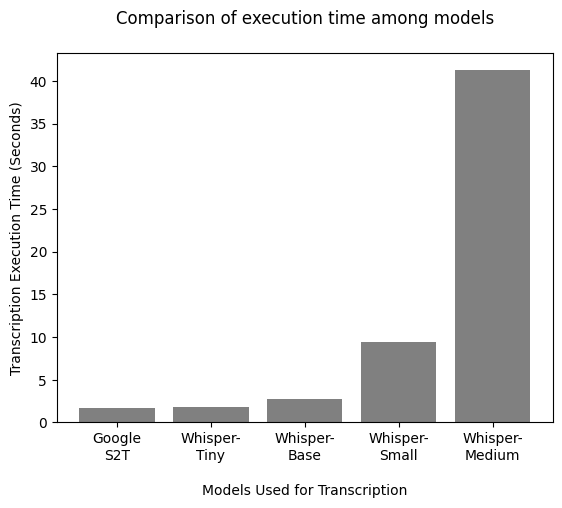

In [76]:
from matplotlib import pyplot as plt

plt.xlabel('\nModels Used for Transcription')
plt.ylabel('Transcription Execution Time (Seconds)')
plt.title("Comparison of execution time among models\n")

x = ['Google\nS2T']
plt.bar(x, google_times, color='gray')

x = ['Whisper-\nTiny', 'Whisper-\nBase', 'Whisper-\nSmall', 'Whisper-\nMedium']
plt.bar(x, whisper_times, color='gray')
plt.savefig("comparsion.png")
plt.show()